In [1]:
%matplotlib inline

from astra_modules import *

from cycler import cycler
from matplotlib.ticker import AutoMinorLocator

def plot_config():
    fsize = 14 # a quarter of the paper width: 20 pt; half of the paper width: 12
    font = {'size' : fsize, 'family' : 'serif'}
    color_cycle = ['r', 'b', 'g', 'c', 'm', 'y', 'k']
    linestyle_cycle = ['-', '--', '-.', ':', (0, (5, 2, 5, 2)), (0, (10, 2, 5, 2, 2, 2)), (0, (12, 2, 2, 2))]
    marker_cycle = ['o', 'd', 'v', '^', '<', '>', '*']
    
    mpl.rc('font', **font)
    mpl.rc('xtick', labelsize = 10, direction = 'in', top   = True)
    mpl.rc('ytick', labelsize = 10, direction = 'in', right = True)
    mpl.rc('xtick.major', size = 5, width = 1)
    mpl.rc('ytick.major', size = 5, width = 1)
    mpl.rc('xtick.minor', size = 3, width = 0.7, visible = True)
    mpl.rc('ytick.minor', size = 3, width = 0.7, visible = True)
    
    mpl.rc('lines', linewidth=2, markersize=6, color='r')
    # mpl.rc('lines', linestyle = 'solid')
    mpl.rc('axes', labelpad = 0, prop_cycle=(cycler('color', color_cycle) + cycler('linestyle', linestyle_cycle) + cycler('marker', marker_cycle)))
    mpl.rc('legend', fontsize = 12, labelspacing = 0.05, handletextpad=0.4, frameon=False, handlelength=2.1)
    
    mpl.rc('figure', dpi = 300, figsize = (4, 4))
    mpl.rc('figure.subplot', bottom = 0.15, top = 0.9, left = 0.15, right = 0.9)
    
    return
plot_config()

## Astra modules

In [58]:
workdir = r'C:\Users\lixiangk\Desktop\test'
os.chdir(workdir)

I2B = lambda I: -(0.0000372+0.000588*I)
B2I = lambda B: (-B-0.0000372)/0.000588

field_maps = '../field-maps/'

sigma_x = sigma_y = 1.; thermal = 0 #0.64/0.75*sigma_x
phi_gun, phi_booster = 0, 0
Imain = 385.855; MaxB = I2B(Imain)
MaxE_booster = 10.

generator = Generator(FNAME = 'beam.ini', IPart = 50000, Species = 'electrons', Q_total = -4.,\
                      Ref_Ekin = 0.0e-6, LE = 0.55e-3, dist_pz = 'i',
                      Dist_z = 'p', Lt = 21.5e-3, rt = 2e-3, Cathode = True,\
                      Dist_x = 'r', sig_x = sigma_x, Dist_px = 'g', Nemit_x = 0,\
                      Dist_y = 'r', sig_y = sigma_x, Dist_py = 'g', Nemit_y = 0)


newrun = Module('Newrun', Run = 1, Head = 'PITZ beam line simulation',\
                Distribution = 'beam.ini', Auto_Phase = True, Track_All = True,\
                check_ref_part = False, Lprompt = False)
newrun.set(Run = 1)


charge = Module('Charge', LSPCH = True, Nrad = 50, Nlong_in = 50, N_min = 10, Max_scale = 0.05, Max_count = 20)
cavity = Module('Cavity', LEfield = True, File_Efield = [field_maps+'gun45cavity.txt', field_maps+'CDS14_15mm.txt'],\
                MaxE = [60, MaxE_booster], C_pos = [0., 2.675], Nue = [1.3, 1.3], Phi = [phi_gun, phi_booster])

soleno = Module('Solenoid', LBfield = True, File_Bfield = [field_maps+'gunsolenoidsPITZ.txt'], MaxB = MaxB, S_pos = [0.])
output = Module('Output', Zstart = 0, Zstop = 5.28, Zemit = 200, Zphase = 2, RefS = True,\
                EmitS = True, PhaseS = True, TrackS = True, LandFS = True)
apertu = Module('Aperture', LApert = True, File_Aperture = [field_maps+'app.txt'])

#quadru = Module('Quadrupole', Lquad = True)

astra = Astra()
astra.add_modules([newrun, charge, cavity, soleno, output, apertu])

generator.write()
astra.write()

In [56]:
#os.system('generator gen.in')
os.mkdir()
#print B2I(-0.2269200)

385.855102041


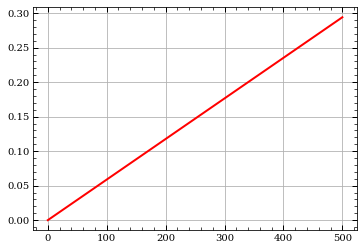

In [23]:
I = np.linspace(0, 500, 101)
B = I2B(I)
plt.plot(I, B, '-')
plt.grid()

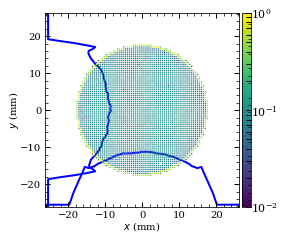

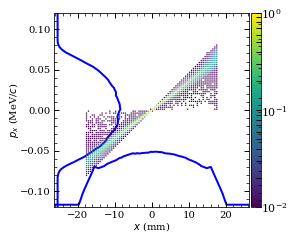

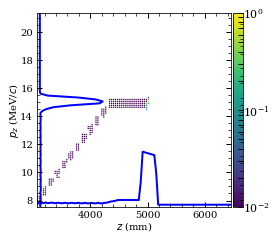

In [54]:
workdir = r'C:\Users\lixiangk\Desktop\test'
os.chdir(workdir)

fig_ext = '@5m.png'

plot_phase_space('ast.0500.001')

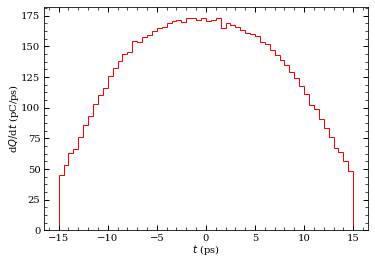

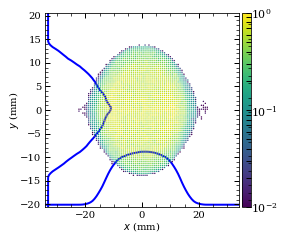

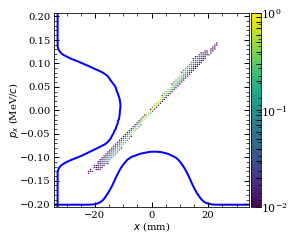

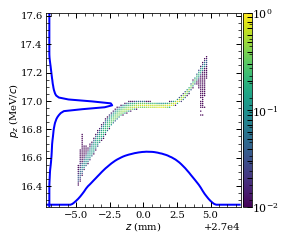

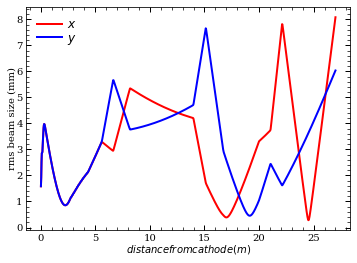

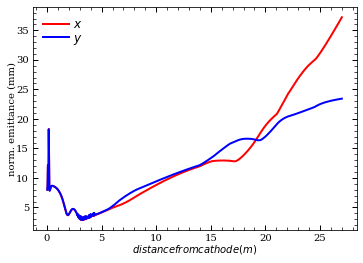

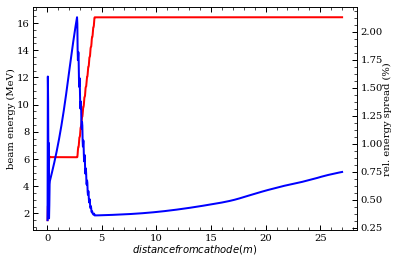

In [51]:
plot_rms_xy('pithz100um')
plot_emi_xy('pithz100um')
plot_kin('pithz100um')

In [24]:
kv = {'one':1, 'two':2, 'three':3, 'four':4}
for k, v in kv.items():
    print k, v

k, v = 'MaxE', np.array([1, 2, 3])
if isinstance(v, (list, np.ndarray)):
    for i, vv in enumerate(v):
        print str.format(' %s[%d]=%f\n' % (k, i, vv))

four 4
three 3
two 2
one 1


In [14]:
from timeit import default_timer
default_timer()
for i in zip([2, 4], np.arange(5)):
    print i

(2, 0)
(4, 1)


In [3]:
class Newrun:
    def __init__(self,head='',dis='',auto='false',track='true',check='false',run=1):
        self.Run=1
        self.Head=''
        self.Distribution=''
        self.Track_all='true'
        self.Auto_phase='true'
        self.check_ref_particle='false'
        self.offset=np.zeros(3)
        self.Z_min=-0.01
        self.H_max=0.005
        self.H_min=0
    def set_newrun(self,head='',dis='',auto='false',track='true',check='false',run=1):
        self.Head=head
        self.Distribution=dis
        self.Auto_phase=auto
        self.Track_all=track
        self.check_ref_particle=check
        self.Run=run
    def set_offset(self,offset=[0,0,0]):
        self.offset=offset
    def set_timestep(self,H_max=0.001,H_min=0,zmin=0):
        self.Z_min=zmin
        self.H_min=H_min
        self.H_max=H_max
    def output(self):
        oo='&NEWRUN \n Head=\''+self.Head+'\'\n'+\
        str.format(' RUN=%d\n' % (self.Run))+\
        str.format(' Distribution=\'%s\'\n' % (self.Distribution))+\
        str.format(' Xoff=%.6f\n' % (self.offset[0]))+\
        str.format(' Yoff=%.6f\n' % (self.offset[1]))+\
        str.format(' Zoff=%.6f\n' % (self.offset[2]))+\
        str.format(' TRACK_ALL=%s\n' % (self.Track_all))+\
        str.format(' AUTO_PHASE=%s\n' % (self.Auto_phase))+\
        str.format(' check_ref_part=%s\n' % (self.check_ref_particle))+\
        str.format(' H_max=%.6f\n' % (self.H_max))+\
        str.format(' H_min=%.6f\n' % (self.H_min))+\
        str.format(' Z_min=%.6f\n' % (self.Z_min))+\
        str.format(' Lprompt=false\n')
        oo=oo+'&\n'
        return oo
class Charge:
    def __init__(self):
        self.Lspch='true'
        self.Lspch3d='false'
        self.Lmirror='true'
        self.Nrad=20
        self.Nlong_in=50
        self.N_min=10
        self.Max_scale=0.05
        self.Max_count=20
    def set_charge(self,lsp='true',lm='true',lsp3d='false'):
        self.Lspch=lsp
        self.Lmirror=lm
        self.Lspch3d=lsp3d
    def set_grid(self,nrad=50,nlong=100):
        self.Nrad=nrad
        self.Nlong_in=nlong
    def set_scale(self,scale,count):
        self.Max_scale=scale
        self.Max_count=count
    def Set_Nmin(self,nmin):
        self.N_min=nmin

    def output(self):
        oo='&CHARGE \n'+\
        str.format(' LSPCH=%s\n' % (self.Lspch))+\
        str.format(' LSPCH3D=%s\n' % (self.Lspch3d))+\
        str.format(' Lmirror=%s\n' % (self.Lmirror))+\
        str.format(' Nrad=%.0f\n' % (self.Nrad))+\
        str.format(' Nlong_in=%.0f\n' % (self.Nlong_in))+\
        str.format(' N_min=%.0f\n' % (self.N_min))+\
        str.format(' Max_scale=%.6f\n' % (self.Max_scale))+\
        str.format(' Max_count=%.0f\n' % (self.Max_count))
        oo=oo+'&\n'
        return oo
class Dipole:
    def __init__(self,num=1,ldipole='true',smooth=3):
        self.Ld='true'
        self.num=num
        self.d_type=np.empty(num,dtype='S16')
        self.pos=np.zeros(num)
        self.gap=np.zeros(num)
        self.strength=np.zeros(num)
        self.radius=np.zeros(num)
        self.d24=np.zeros([num,2,4])
        self.xoff=np.zeros(num)
        self.yoff=np.zeros(num)
        self.xrot=np.zeros(num)
        self.yrot=np.zeros(num)
        self.zrot=np.zeros(num)
        self.smooth=np.ones(num)*smooth
    
    def set_dipole(self,seq=0,d_type='horizontal',pos=0,gap=0.05,strength=0,radius=0):
        self.d_type[seq]=d_type
        self.pos[seq]=pos
        self.gap[seq]=gap
        self.strength[seq]=strength
        self.radius[seq]=radius
        
    def set_d24(self,seq=0,a=0,b=0,c=0,alp=0,beta=0,delta=[0,0]):
        gam=alp/2.-beta
        rot=alp/2.
        r=[0,0]
        r=-c/2.*np.sin(gam), c/2.*np.cos(gam)
        self.d24[seq,1,0],self.d24[seq,0,0]=transform2D(r,rot,delta)
        r= c/2.*np.sin(gam),-c/2.*np.cos(gam)
        self.d24[seq,1,1],self.d24[seq,0,1]=transform2D(r,rot,delta)
        r= c/2.*np.sin(gam)+(a+b)/2., c/2.*np.cos(gam)
        self.d24[seq,1,2],self.d24[seq,0,2]=transform2D(r,rot,delta)
        r=-c/2.*np.sin(gam)+(a+b)/2.,-c/2.*np.cos(gam)
        self.d24[seq,1,3],self.d24[seq,0,3]=transform2D(r,rot,delta)
        
        self.d24[seq,1,:]=self.pos[seq]+self.d24[seq,1,:]
        #self.radius[seq]=-np.sqrt(((self.d24[seq,0,3]+self.d24[seq,0,2])/2.-(self.d24[seq,0,1]+self.d24[seq,0,0])/2.)**2+\
        #                     ((self.d24[seq,1,3]+self.d24[seq,1,2])/2.-(self.d24[seq,1,1]+self.d24[seq,1,0])/2.)**2)/2./np.sin(alp/2.)
    
    def set_d24_1(self,seq=0,a=0,b=0,c=0,alp=0,gam=0,delta=[0,0]):
        rot=alp/2.
        r=[0,0]
        r=-c/2.*np.sin(gam), c/2.*np.cos(gam)
        self.d24[seq,1,0],self.d24[seq,0,0]=transform2D(r,rot,delta)
        r= c/2.*np.sin(gam),-c/2.*np.cos(gam)
        self.d24[seq,1,1],self.d24[seq,0,1]=transform2D(r,rot,delta)
        r= c/2.*np.sin(gam)+(a+b)/2., c/2.*np.cos(gam)
        self.d24[seq,1,2],self.d24[seq,0,2]=transform2D(r,rot,delta)
        r=-c/2.*np.sin(gam)+(a+b)/2.,-c/2.*np.cos(gam)
        self.d24[seq,1,3],self.d24[seq,0,3]=transform2D(r,rot,delta)
        
        self.d24[seq,1,:]=self.pos[seq]+self.d24[seq,1,:]
    
    def set_d24_2(self,seq=0,a=0,b=0,h=0,alp=0,delta=[0,0]):
        ''' 
            以偏转轨迹的中心为原点，给出偏转轨迹外的磁极面长度a，偏转轨迹内的磁极面长度b，
            以及沿半径方向的高度h，alp为偏转方向，delta为中心的位置（2016.5）
        '''
        if self.radius[seq]>0:
            dh=self.radius[seq]*(1-np.cos(alp/2.))
        else:
            dh=0
        rot=alp/2.
        r=[0,0]
        r=-a/2., h/2.+dh # z,x
        self.d24[seq,1,0],self.d24[seq,0,0]=transform2D(r,rot,delta)
        r=-b/2.,-h/2.
        self.d24[seq,1,1],self.d24[seq,0,1]=transform2D(r,rot,delta)
        r= a/2., h/2.
        self.d24[seq,1,2],self.d24[seq,0,2]=transform2D(r,rot,delta)
        r= b/2.,-h/2.
        self.d24[seq,1,3],self.d24[seq,0,3]=transform2D(r,rot,delta)
        
        self.d24[seq,1,:]=self.pos[seq]+self.d24[seq,1,:]
    
    def set_offset(self,seq=0,xoff=0,yoff=0):
        self.xoff[seq]=xoff
        self.yoff[seq]=yoff
    def set_rotation(self,seq=0,xrot=0,yrot=0,zrot=0):
        self.xrot[seq]=xrot
        self.yrot[seq]=yrot
        self.zrot[seq]=zrot
        
    def output(self,seq=1):
        oo='&DIPOLE \n LDipole='+self.Ld+'\n'
        for i in np.arange(self.num):
            seq=i
            oo=oo+str.format(' D_Type(%d)=\'%s\'\n' % (seq+1,self.d_type[seq]))+\
            str.format(' D1(%d)=(%.6f,%.6f)\n' % (seq+1,self.d24[seq,0,0],self.d24[seq,1,0]))+\
            str.format(' D2(%d)=(%.6f,%.6f)\n' % (seq+1,self.d24[seq,0,1],self.d24[seq,1,1]))+\
            str.format(' D3(%d)=(%.6f,%.6f)\n' % (seq+1,self.d24[seq,0,2],self.d24[seq,1,2]))+\
            str.format(' D4(%d)=(%.6f,%.6f)\n' % (seq+1,self.d24[seq,0,3],self.d24[seq,1,3]))+\
            str.format(' D_Gap(1,%d)=%.6f\n' % (seq+1,self.gap[seq]))+\
            str.format(' D_Gap(2,%d)=%.6f\n' % (seq+1,self.gap[seq]))+\
            str.format(' D_strength(%d)=%.6f\n' % (seq+1,self.strength[seq]))+\
            str.format(' D_xoff(%d)=%.6f\n' % (seq+1,self.xoff[seq]))+\
            str.format(' D_yoff(%d)=%.6f\n' % (seq+1,self.yoff[seq]))+\
            str.format(' D_xrot(%d)=%.6f\n' % (seq+1,self.xrot[seq]))+\
            str.format(' D_yrot(%d)=%.6f\n' % (seq+1,self.yrot[seq]))+\
            str.format(' D_zrot(%d)=%.6f\n' % (seq+1,self.zrot[seq]))+\
            str.format(' D_radius(%d)=%.6f\n' % (seq+1,self.radius[seq]))
        oo=oo+'&\n'
        return oo
class Quadrupole:
    def __init__(self,num=1,lquad='true',smooth=3):
        self.Lquad=lquad
        self.num=num
        self.pos=np.zeros(num)
        self.length=np.zeros(num)
        self.bore=np.zeros(num)
        self.grad=np.zeros(num)
        self.xoff=np.zeros(num)
        self.yoff=np.zeros(num)
        self.xrot=np.zeros(num)
        self.yrot=np.zeros(num)
        self.zrot=np.zeros(num)
        self.smooth=np.ones(num)*smooth
    def set_quadrupole(self,seq=0,pos=0,length=0,bore=0,grad=0):
        self.pos[seq]=pos
        self.length[seq]=length
        self.bore[seq]=bore
        self.grad[seq]=grad
    def set_offset(self,seq=0,xoff=0,yoff=0):
        self.xoff[seq]=xoff
        self.yoff[seq]=yoff
    def set_rotation(self,seq=0,xrot=0,yrot=0,zrot=0):
        self.xrot[seq]=xrot
        self.yrot[seq]=yrot
        self.zrot[seq]=zrot
    def output(self): 
        oo='&QUADRUPOLE \n Lquad='+self.Lquad+'\n'
        for i in np.arange(self.num):
            seq=i
            oo=oo+str.format(' Q_pos(%d)=%.6f\n' % (seq+1,self.pos[seq]))+\
            str.format(' Q_length(%d)=%.6f\n' % (seq+1,self.length[seq]))+\
            str.format(' Q_bore(%d)=%.6f\n' % (seq+1,self.bore[seq]))+\
            str.format(' Q_grad(%d)=%.6f\n' % (seq+1,self.grad[seq]))+\
            str.format(' Q_xoff(%d)=%.6f\n' % (seq+1,self.xoff[seq]))+\
            str.format(' Q_yoff(%d)=%.6f\n' % (seq+1,self.yoff[seq]))+\
            str.format(' Q_xrot(%d)=%.6f\n' % (seq+1,self.xrot[seq]))+\
            str.format(' Q_yrot(%d)=%.6f\n' % (seq+1,self.yrot[seq]))+\
            str.format(' Q_zrot(%d)=%.6f\n' % (seq+1,self.zrot[seq]))+\
            str.format(' Q_smooth(%d)=%d\n' % (seq+1,self.smooth[seq]))
        oo=oo+'&\n'
        return oo
class Output:
    def __init__(self,zstart=0,zstop=1,zemit=10,zphase=2,ns=0):
        self.Zstart=zstart
        self.Zstop=zstop
        self.Zemit=zemit
        self.Zphase=zphase
        self.NS=ns
        self.Screen=np.zeros(1)
        self.control={'Lmagnetized':'false','RefS':'true','EmitS':'true','PhaseS':'true',\
                      'TrackS':'true','LandFS':'true','Local_emit':'true','Lproject_emit':'false',\
                      'Tr_emitS':'false'}
    def set_output(self,zstart=0,zstop=1,zemit=10,zphase=2,ns=0):
        self.Zstart=zstart
        self.Zstop=zstop
        self.Zemit=zemit
        self.Zphase=zphase
        self.NS=ns
    def set_screen(self,a):
        self.Screen=a
    def output(self):
        oo='&OUTPUT \n'+\
        str.format(' ZSTART=%.6f\n' % (self.Zstart))+\
        str.format(' ZSTOP=%.6f\n' % (self.Zstop))+\
        str.format(' Zemit=%d\n' % (self.Zemit))+\
        str.format(' Zphase=%d\n' % (self.Zphase))
        if self.Screen[0]!=0:
            for i in np.arange(len(self.Screen)):
                oo=oo+str.format(' Screen(%d)=%.6f\n' % (i+1,self.Screen[i]))
        for k,v in self.control.iteritems():
            oo=oo+str.format(' %s=%s\n' %(k,v))
        oo=oo+'&\n'
        return oo
class Cavity:
    def __init__(self,num=1,LE='true',smooth=3):
        self.num=num
        self.LEfield=LE
        self.C_pos=np.zeros(num) # m
        self.MaxE=np.zeros(num)  # MV/m
        self.Nue=np.zeros(num)   # GHz
        self.Phi=np.zeros(num)   # deg
        self.File_Efield=np.empty(num, dtype=object)
        self.C_smooth=3
    def set_cavity(self,i,pos,Ea,freq,phi,fname):
        self.C_pos[i]=pos
        self.MaxE[i]=Ea
        self.Nue[i]=freq
        self.Phi[i]=phi
        self.File_Efield[i]=fname
    def output(self):
        oo='&CAVITY \n'+' LEField='+self.LEfield+'\n'
        for i in np.arange(self.num):
            seq=i
            oo=oo+str.format(' C_pos(%d)=%.6f\n' % (seq+1,self.C_pos[seq]))+\
            str.format(' MaxE(%d)=%.6f\n' % (seq+1,self.MaxE[seq]))+\
            str.format(' Nue(%d)=%.6f\n' % (seq+1,self.Nue[seq]))+\
            str.format(' Phi(%d)=%.6f\n' % (seq+1,self.Phi[seq]))+\
            str.format(' File_Efield(%d)=\'%s\'\n' % (seq+1,self.File_Efield[i]))+\
            str.format(' C_smooth(%d)=%d, C_higher_order(%d)=T\n' % (seq+1,self.C_smooth,seq+1))
        oo=oo+'&\n'
        return oo
class Solenoid:
    def __init__(self,num,LB='true'):
        self.num=num
        self.LBfield=LB
        self.S_pos=np.zeros(num) # m
        self.MaxB=np.zeros(num)  # T
        self.File_Bfield=np.empty(num, dtype=object)
        self.C_smooth=3
    def set_solenoid(self,i,pos,freq,fname):
        self.S_pos[i]=pos
        self.MaxB[i]=freq
        self.File_Bfield[i]=fname
    def output(self):
        oo='&SOLENOID \n'+' LBField='+self.LBfield+'\n'
        for i in np.arange(self.num):
            seq=i
            oo=oo+str.format(' S_pos(%d)=%.6f\n' % (seq+1,self.S_pos[seq]))+\
            str.format(' MaxB(%d)=%.6f\n' % (seq+1,self.MaxB[seq]))+\
            str.format(' File_Bfield(%d)=\'%s\'\n' % (seq+1,self.File_Bfield[i]))
            str.format(' S_smooth(%d)=%d, S_higher_order(%d)=T\n' % (seq+1,self.S_smooth,seq+1))
        oo=oo+'&\n'
        return oo

# example: achromatic section
def example():
    Lquad,Rquad=0.09,2.15e-2

    pos,R,alpha=4.931,0.2,45./180*np.pi
    q_coor=[]
    b_coor=[]

    L=0.732
    z,x=pos+L,0
    q_coor.append([z,x])
    L=0.732+0.25
    z,x=pos+L,0
    q_coor.append([z,x])

    ## begining of bending
    L=1.242
    z,x=pos+L+R*np.sin(alpha/2.),R*(np.cos(alpha/2)-1)
    b_coor.append([z,x])

    ZB1,XB1=pos+L+R*np.sin(alpha),R*(np.cos(alpha)-1)
    #coor=[]
    L=0.2215
    z,x=ZB1+L*np.cos(alpha),XB1-L*np.sin(alpha)
    q_coor.append([z,x])
    L=0.2215+0.25
    z,x=ZB1+L*np.cos(alpha),XB1-L*np.sin(alpha)
    q_coor.append([z,x])
    L=1.567-0.2215-0.25
    z,x=ZB1+L*np.cos(alpha),XB1-L*np.sin(alpha)
    q_coor.append([z,x])
    L=1.567-0.2215
    z,x=ZB1+L*np.cos(alpha),XB1-L*np.sin(alpha)
    q_coor.append([z,x])

    L=1.567
    z,x=ZB1+L*np.cos(alpha)+R*(np.sin(alpha)-np.sin(alpha/2.)),XB1-L*np.sin(alpha)-R*(np.cos(alpha/2.)-np.cos(alpha))
    b_coor.append([z,x])
    ## end of bending

    ## another two quads
    z,x=ZB1+L*np.cos(alpha)+R*np.sin(alpha)+0.1,XB1-L*np.sin(alpha)-R*(1-np.cos(alpha))
    q_coor.append([z,x])
    z,x=z+0.25,x
    q_coor.append([z,x])

    q_coor=np.array(q_coor)
    b_coor=np.array(b_coor)

    plt.figure(figsize=(5,5))
    plt.plot(b_coor[:,0],b_coor[:,1],'r-*')
    plt.plot(q_coor[:,0],q_coor[:,1],'b-*')
    ###
    data=np.loadtxt('ast.ref.001')
    plt.plot(data[:,0],data[:,5]/1000,'g')
    ###
    plt.grid()
    plt.savefig('traj.eps')
    plt.show()
    for i in np.arange(6):
        print str.format('set arrow from %.6f,graph 0 to %.6f,graph 1 lc 1' % (q_coor[i,0],q_coor[i,0]))
    for i in np.arange(2):
        print str.format('set arrow from %.6f,graph 0 to %.6f,graph 1 lc 2' % (b_coor[i,0],b_coor[i,0]))

In [3]:
workdir="D:\\Dropbox\\CEA\\Results\\scaling-laws-refined-3d\\plasma-lens"
os.chdir(workdir)

newrun=Newrun()
newrun.set_newrun(head='Plasma lens before the 5 GeV acceleration stage',\
                  dis='./plasma-lens.ini')
charge=Charge()
charge.set_charge(lsp='true', lsp3d='true')

cavity = Cavity()
cavity.set_cavity(0, 2e-2, 0.0403, 0, 0, './3D-plasma-lens')

output=Output()
output.set_output(zstart=-0.1,zstop=0.2,zemit=20,zphase=10)

ss=newrun.output()+charge.output()+cavity.output()+output.output()
#charge.output()+
ff = open('ast.in', 'w')
ff.write(ss)
ff.close()

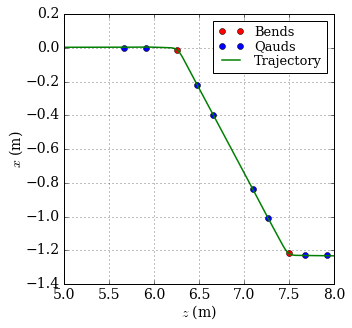

In [21]:
##
workdir="E:\\Dropbox\\OTHER\\Sources\\python\\transport"
os.chdir(workdir)

Lquad,Rquad=0.09,2.15e-2

pos,R,alpha=4.937,0.2,45./180*np.pi
q_coor=[]
b_coor=[]

L=0.726
z,x=pos+L,0
q_coor.append([z,x])
L=0.726+0.25
z,x=pos+L,0
q_coor.append([z,x])

## begining of bending
L=1.242
z,x=pos+L+R*np.sin(alpha/2.),R*(np.cos(alpha/2)-1)
b_coor.append([z,x])

ZB1,XB1=pos+L+R*np.sin(alpha),R*(np.cos(alpha)-1)
#coor=[]
L=0.22625
z,x=ZB1+L*np.cos(alpha),XB1-L*np.sin(alpha)
q_coor.append([z,x])
L=0.22625+0.25
z,x=ZB1+L*np.cos(alpha),XB1-L*np.sin(alpha)
q_coor.append([z,x])
L=1.5725-0.22625-0.25
z,x=ZB1+L*np.cos(alpha),XB1-L*np.sin(alpha)
q_coor.append([z,x])
L=1.5725-0.22625
z,x=ZB1+L*np.cos(alpha),XB1-L*np.sin(alpha)
q_coor.append([z,x])

L=1.5725
z,x=ZB1+L*np.cos(alpha)+R*(np.sin(alpha)-np.sin(alpha/2.)),XB1-L*np.sin(alpha)-R*(np.cos(alpha/2.)-np.cos(alpha))
b_coor.append([z,x])
## end of bending

## another two quads
z,x=ZB1+L*np.cos(alpha)+R*np.sin(alpha)+0.1,XB1-L*np.sin(alpha)-R*(1-np.cos(alpha))
q_coor.append([z,x])
z,x=z+0.25,x
q_coor.append([z,x])

q_coor=np.array(q_coor)
b_coor=np.array(b_coor)

plt.figure(figsize=(5,5))
plt.plot(b_coor[:,0],b_coor[:,1],'ro')
plt.plot(q_coor[:,0],q_coor[:,1],'bo')
###
data=np.loadtxt('ast.ref.001')
plt.plot(data[:,0],data[:,5]/1000,'g')
###
plt.grid()
plt.xlabel(r'$z$ (m)')
plt.ylabel(r'$x$ (m)')
plt.legend(['Bends', 'Qauds', 'Trajectory'])
plt.savefig('traj.eps')
plt.show()
#for i in np.arange(6):
#    print str.format('set arrow from %.6f,graph 0 to %.6f,graph 1 lc 1' % (q_coor[i,0],q_coor[i,0]))
#for i in np.arange(2):
#    print str.format('set arrow from %.6f,graph 0 to %.6f,graph 1 lc 2' % (b_coor[i,0],b_coor[i,0]))

In [19]:
grad=-np.array([-0.1284, 0.3063, 0.4637,-0.4133,-0.4133, 0.4637,0.,-0.])*0.1/2.15e-2 
grad=-np.array([-0.1284, 0.3063, 0.457,-0.415,-0.415, 0.457,0.,-0.])*0.1/2.15e-2 

strength=np.array([0.1893,-0.1893])

newrun=Newrun()
newrun.set_newrun(head='Achromatic section of CAEP FEL-THz facility',\
                  dis='./ast.0500.000')
charge=Charge()
charge.set_charge(lsp='true', lsp3d='true')

pos0=0
#a,b,c=102e-3,120e-3,100.4e-3
alpha,beta=45*np.pi/180.,17.355*np.pi/180.

a1,b1,c1=102e-3,120e-3,100e-3
dipole=Dipole(2)
for i in np.arange(2):
    dipole.set_dipole(i,pos=b_coor[i,0],strength=strength[i],gap=0.045,radius=0)
    dipole.set_offset(i,xoff=b_coor[i,1])
dipole.set_d24_2(0,a1,b1,c1,alpha)
dipole.set_d24_2(1,b1,a1,c1,alpha)

quadrupole=Quadrupole(6)
for i in np.arange(6):
    quadrupole.set_quadrupole(i,pos=q_coor[i,0],bore=Rquad,grad=grad[i],length=0.09)
    quadrupole.set_offset(i,xoff=q_coor[i,1])
for i in np.arange(2,6):
    quadrupole.set_rotation(i,xrot=-alpha)

output=Output()
output.set_output(zstart=4,zstop=8,zemit=400,zphase=2)

ss=newrun.output()+charge.output()+dipole.output()+quadrupole.output()+output.output()
#charge.output()+
ff = open('ast.in', 'w')
ff.write(ss)
ff.close()

-45.001313806


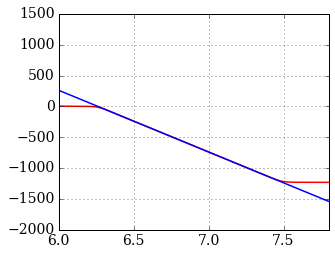

In [12]:
datafile='ast.ref.001'
data=np.loadtxt(datafile)

f = lambda x, a, b:a+b*x
[a,b], pcov = curve_fit(f, data[1000:1500,0], data[1000:1500,5]*1e-3)
print np.arctan(b)*180/np.pi

fig,ax=plt.subplots()
ax.plot(data[:,0],data[:,5],'-')
ax.plot(data[:,0],f(data[:,0],a,b)*1e3,'-')
ax.set_xlim(6,7.8)
ax.grid()

In [10]:
xx=np.array([1.85,1.8975])
yy=np.array([45.4531,44.9541])
ff=interp1d(yy,xx,bounds_error=False)
print ff(45)

1.89313076152


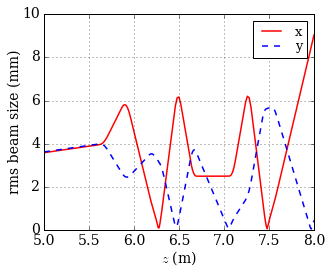

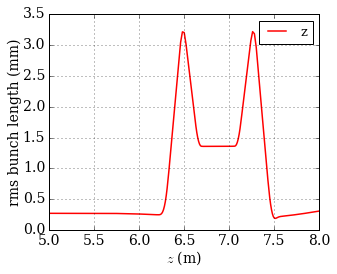

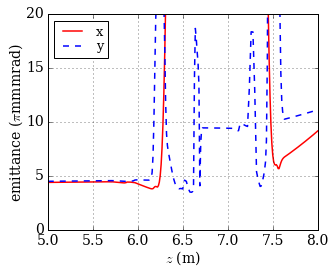

In [20]:
d1=np.loadtxt('ast.Xemit.001')
d2=np.loadtxt('ast.Yemit.001')
d3=np.loadtxt('ast.Zemit.001')

fig,ax=plt.subplots()
ax.plot(d1[:,0],d1[:,3],'r')
ax.plot(d2[:,0],d2[:,3],'b')
ax.legend(['x', 'y'])
ax.set_xlabel(r'$z$ (m)')
ax.set_ylabel(r'rms beam size (mm)')
#ax.set_xlim(6,7.8)
ax.grid()
fig.savefig('beamsize-z.eps')

fig,ax=plt.subplots()
ax.plot(d3[:,0],d3[:,3],'r')
ax.legend(['z'])
ax.set_xlabel(r'$z$ (m)')
ax.set_ylabel(r'rms bunch length (mm)')
#ax.set_xlim(6,7.8)
ax.grid()
fig.savefig('bunchlength-z.eps')

fig,ax=plt.subplots()
ax.plot(d1[:,0],d1[:,5],'r')
ax.plot(d2[:,0],d2[:,5],'b')
ax.legend(['x', 'y'],loc='upper left')
ax.set_xlabel(r'$z$ (m)')
ax.set_ylabel(r'emittance ($\pi $mmmrad)')
ax.set_ylim(0,20)
ax.grid()
fig.savefig('emittance-z.eps')

In [17]:
## 旋转电子束
def rotate_by(alpha,infile,outfile):
    data=np.loadtxt(infile)

    data[1:,2]=data[1:,2]+data[0,2]  # z
    data[1:,5]=data[1:,5]+data[0,5]  # pz 

    xc=np.mean(data[:,0])
    data[:,0]=data[:,0]-xc
    zc=np.mean(data[:,2])
    data[:,2]=data[:,2]-zc

    for i in np.arange(len(data)):
        r=[data[i,2],data[i,0]]
        r1=transform2D(r,alpha)
        p=[data[i,5],data[i,3]]
        p1=transform2D(p,alpha)
        data[i,2]=r1[0]
        data[i,0]=r1[1]
        data[i,5]=p1[0]
        data[i,3]=p1[1]

    data[1:,2]=data[1:,2]-data[0,2]
    data[0,2]=0
    data[1:,5]=data[1:,5]-data[0,5]
    np.savetxt(outfile,data,fmt='%12.4E')
def test_rotate_by():
    workdir='E:\\Lixiangkun\\Work\\ERL-THz\\Arc1'
    os.chdir(workdir)

    alpha=0/180*np.pi
    rotate_by(alpha,'ast.0400.000','ast.0400.rot')

    data=np.loadtxt('ast.0400.rot')
    data[1:,2]=data[1:,2]+data[0,2]
    data[1:,5]=data[1:,5]+data[0,5]

    fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
    axes[0].plot(data[:,2],data[:,0],'r.')
    axes[1].plot(data[:,5]/1e4,data[:,3]/1e4,'r.')
    axes[0].grid()
    axes[1].grid()

In [ ]:
## 生成束流孔径文件
def test_aperture():
    workdir='./'
    os.chdir(workdir)

    aperture=[] # 第一列长度:m，第二列半径:mm
    aperture.append([0.132-0.0205,17.5])
    aperture.append([0.1776,17.5])
    aperture.append([0.568,17.5])
    aperture.append([0.1255,31.5])
    aperture.append([0.097,31.5])
    aperture.append([0.084,31.5])
    aperture.append([0.05,31.5])
    aperture.append([0.5,75])
    aperture.append([0.015,66.5])

    aperture=np.array(aperture)

    rr=[]
    pos=0
    [length,rad]=aperture[0]
    rr.append([pos,rad])
    for i in np.arange(len(aperture)):
        [length,rad]=aperture[i]
        pos=pos+0.001
        rr.append([pos,rad])
        pos=pos+length-0.001
        rr.append([pos,rad])
    rr.append([pos+0.953,2.98])
    rr.append([pos+0.953+0.025,2.98])
    rr=np.array(rr)
    plt.plot(rr[:,0],rr[:,1],'r-')
    plt.grid()
    plt.show()
    np.savetxt('aperture.dat',rr,fmt='%12.4E%12.4E')

## astra输出文件后处理函数

In [2]:
f1 = lambda x,a,b:a*x+b
f2 = lambda x,a,b,c:a*x**2+b*x+c
f3 = lambda x,a,b,c,d:a*x**3+b*x**2+c*x+d

def lsq(x,y):
    ''' Least square fitting
        Input: x-y coordinates to be fitted
        Output: [a b r], a is slope'''
    xc,yc=np.mean(x),np.mean(y)
    xyc=np.mean(x*y)
    x2c=np.mean(x*x)
    y2c=np.mean(y*y)
    
    a=(xyc-xc*yc)/(x2c-xc**2)
    b=yc-a*xc
    r=np.abs((xyc-xc*yc)/np.sqrt((x2c-xc**2)*(y2c-yc**2)))
    return np.array([a,b,r])
def nemixrms(x,xp):
    '''input: x-xp phase space
       output: emittance'''
    return np.sqrt(np.var(x)*np.var(xp)-np.mean((x-np.mean(x))*(xp-np.mean(xp)))**2)
def astra_post(data):
    '''input data: x y z Px Py Pz
       output: avgz nemit_x nemit_y std_x std_y std_z Ekin std_Ekin nemit_z'''

    x,y,z=data[:,0],data[:,1],data[:,2]
    bgx,bgy,bgz=data[:,3]/511000,data[:,4]/511000,data[:,5]/511000
    gamma=np.sqrt(1+bgx**2+bgy**2+bgz**2)
    Ek=np.sqrt(1+bgx**2+bgy**2+bgz**2)*0.511-0.511
    
    rr=lsq(z,bgz/gamma)
    
    return np.array([np.mean(z),nemixrms(x,bgx)*1e6,nemixrms(y,bgy)*1e6,np.std(x)*1e3,np.std(y)*1e3,np.std(z)*1e3,\
                     np.mean(Ek),np.std(Ek)*1e3,nemixrms(z,Ek)*1e6,len(x),rr[2],np.mean(x),np.mean(y)])                 
def astra_iter_dir(ndir,r1=0.85,r0=0):
    '''对给定文件夹下所有ast.xxxx.001文件运行后处理程序astra_post，并将结果进行保存
       r1和r0分别是待统计粒子的百分比和统计的起始点
    '''    
    ss=''
    sep=os.sep
    for rt, dirs, files in os.walk(ndir):
        for f in files:
            pos=re.match(r'ast.[\d]+.001',f)
            if pos:
                fname=ndir+sep+f
                data=np.loadtxt(fname)
                by=2
                
                zm,pm=data[0,2],data[0,5]
                data[1:,2]=data[1:,2]+zm
                data[1:,5]=data[1:,5]+pm
                
                cc=len(data[:,0])
                c0=(int)(cc-cc*r0)-1
                c1=c0-(int)(cc*r1)
                #print c0,c1
                
                #data=data[data[:,by].argsort()]
                #data=data[c1:c0]
                
                r=astra_post(data)
                for k in np.arange(len(r)):
                    ss=ss+str.format('%12.4E' % r[k])
                ss=ss+'\n'
    
    rr=(int)(r1*100)
    f = open(ndir+sep+'nemit'+`rr`+'.dat', 'w')
    f.write(ss)
    f.close()

## 后处理例子

In [ ]:
## 后处理：计算某一条件下所有位置的束流参数
def test_cal_beam_parameter():
    subdir="D:\\Desktop\\THz-FEL\\10ps\\Part2.1\\0.03245T" 
    astra_iter_dir(subdir,1,0)
    
    ss=''

    subdir="./" 
    root = workdir+os.sep+subdir

    for rt, dirs, files in os.walk(root):
        for f in files:
            pos=re.match(r'ast.[\d]+.001',f)
            if pos:
                fname=subdir+os.sep+f
                data=np.loadtxt(fname)
                by=2

                zm,pm=data[0,2],data[0,5]
                data[1:,2]=data[1:,2]+zm
                data[1:,5]=data[1:,5]+pm

                data=data[data[:,by].argsort()]
                data=data[0:9999]

                #x,y=data[:,2],data[:,5]
                #r=lsq(x,y)

                r=astra_post(data)
                for k in np.arange(len(r)):
                    ss=ss+str.format('%12.4E' % r[k])
                ss=ss+'\n'

    f = open(subdir+os.sep+'nemit100.dat', 'w')
    f.write(ss)
    f.close()

In [ ]:
## 后处理：纵向相空间分布拟合
def test_long_phase_space_fitting():
    datafile='1.00_1.00_1.00/ast.0120.001'
    data=np.loadtxt(datafile)
    by=2

    zm,pm=data[0,2],data[0,5]
    data[1:,2]=data[1:,2]+zm
    data[1:,5]=data[1:,5]+pm

    data=data[data[:,by].argsort()]
    data=data[3500:9999]

    x,y=data[:,2],data[:,5]
    popt, pcov = curve_fit(f, x, y)
    print popt

    a,b=popt[0],popt[1]
    aa,ab,ba,bb=pcov[0,0],pcov[0,1],pcov[1,0],pcov[1,1]

    plt.plot(data[:,2],data[:,5],'.r',x,f(x,a,b),'-b')
    plt.grid()
    plt.show()

    print ab*ba/aa/bb
    print lsq(x,y)

In [ ]:
## 后处理：绘制统计分布曲线及拟合
def test_stat_and_fitting():
    workdir='E:\\Lixiangkun\\Work\\ERL-THz\\Main-acc\\1\\'
    os.chdir(workdir)

    data=np.loadtxt('ast.0400.001',skiprows=0)
    data[0,2]=0
    xx=data[:,2]

    #count, bins, ignored = plt.hist(xx,100)
    #plt.show()

    count, bins = np.histogram(xx,300)

    cc=1./3e8*1e15 # m->fs
    rr=np.array([bins[1:]*cc,count]).T

    g_fit=lambda x,a,b,c,d:a*np.exp(-(x-c)**2/2.0/b**2)+d
    popt,pcov=optimize.curve_fit(g_fit,rr[:,0],rr[:,1],(300,1e-4*cc,-1000,0))
    plt.plot(rr[:,0],rr[:,1],'r+-')
    plt.plot(rr[:,0],g_fit(rr[:,0],popt[0],popt[1],popt[2],popt[3]),'b-')
    #plt.axis([-1000,1000,0,1200])
    plt.grid()
    plt.show()

    print popt
    print np.std(xx)*cc
    #np.savetxt('z.dat',rr,fmt='%12.4f')

    data=np.array([rr[:,0],rr[:,1],g_fit(rr[:,0],popt[0],popt[1],popt[2],popt[3])]).T
    #np.savetxt('z@5.0m.dat',data,fmt='%.4E')

In [4]:
## 根据参考粒子相位插值
def test1():
    workdir='E:\\Lixiangkun\\Work\\THz-FEL\\long-pulse-opt-12ps-4\\12ps_273.23G_124.10G_160.28G'
    os.chdir(workdir)

    data=np.loadtxt('ast.ref.001')
    x=data[:,0] # m
    y=data[:,1] # ns->deg: y=(y*1.3*360)%360
    f=interp1d(x,y)
    plt.plot(x,y,'r*',x,f(x),'b-')
    plt.grid()
    plt.show()

    M1,M2=0.1965,0.1535
    x1=[1.7,3.0+M1,3.8264+M2]
    y1=f(x1)
    y2=(y1*1.3*360)%360
    #print y2,-y2+[0,95,95-180]+360

In [66]:
## 统计发射时丢失的粒子
def test2():
    workdir='E:\\Lixiangkun\\Work\\THz-FEL-1\\280kV-gauss'
    os.chdir(workdir)

    sep=os.sep
    rr=[]
    for rt, dirs, files in os.walk('./'):
        for d in dirs:
            x=re.findall(r'[\d.]+',d)
            if x:
                r=x[1]
                #print d,r
                f=file(d+sep+'astra.log')
                ll=f.readlines()
                for l in ll:
                    y=re.search(r'particles lost with z<Zmin',l)
                    if y:
                        #print y.group()
                        p=re.findall(r'[\d.]+',l)
                        #print p[0]
                        rr.append([x[1],p[0]])
                        break
            #break
    rr=np.array(rr)
    #print rr
    np.savetxt('lost.dat',rr,fmt='%12s')

    plt.plot(rr[:,0],rr[:,1],'r-*')
    plt.grid()
    plt.show()

In [16]:
## 统计束流品质
def test3():
    workdir='E:\\Lixiangkun\\Work\\THz-FEL-3\\bunch-length-opt2'
    os.chdir(workdir)

    sep=os.sep
    rr=[] # dirname:4,xemi,xrms,zrms,DE
    for rt, dirs, files in os.walk('./'):
        for d in dirs:
            x=re.findall(r'[\d.]+',d)
            if x:
                r1=np.zeros(5+4)
                #print d
                for i in np.arange(len(x)):
                    r1[i]=float(x[i])
                data=np.loadtxt(d+sep+'ast.Xemit.001')
                if len(data)>0:
                    r1[5],r1[6]=data[-1,5],data[-1,3]  #xemi,xrms
                data=np.loadtxt(d+sep+'ast.Zemit.001')
                if len(data)>0:
                    r1[7],r1[8]=data[-1,3],data[-1,4]  #zrms,del_E
                    rr.append(r1)
                #break
    rr=np.array(rr)
    #print rr
    #np.savetxt('beam.dat',rr,fmt='%12s')
    
    np.savetxt('beam.dat',rr,fmt='%12.6f')
    plt.plot(rr[:,7],rr[:,5],'r*')
    plt.axis([0,1,0,5])
    plt.grid()
    #plt.show()
    plt.plot(rr[:,7],rr[:,8]/3.5e3*100,'r*')
    plt.axis([0,1,0,1])
    plt.grid()
    #plt.show()

In [2]:
## 参数波动性分析
def test4():
    workdir='E:\\Lixiangkun\\Work\\THz-FEL-1\\320kV-gauss'
    os.chdir(workdir)

    data=np.loadtxt("r28.out9")
    plt.plot(data[:,7],data[:,3],'r+')
    plt.show()

    sub=data[105:,:]
    print np.mean(sub,0)
    print np.std(sub,0)

    s0=np.array([ 1.275,256.6 , 118.2 , 131.8])
    delta=0.0125
    low=s0*(1-delta)
    up=s0*(1+delta)

    choice1=(data[:,2]>low[0])*(data[:,3]>low[1])*(data[:,4]>low[2])*(data[:,5]>low[3])
    choice2=(data[:,2]< up[0])*(data[:,3]< up[1])*(data[:,4] <up[2])*(data[:,5] <up[3])
    choice=choice1*choice2

    n0=data[:,0]
    e0=data[:,7]
    nn=n0[choice]
    ee=e0[choice]
    plt.plot(n0,e0,'r+')
    plt.plot(nn,ee,'b*')
    plt.axis([0,230,2,5])
    plt.grid()
    plt.show()

In [11]:
## 插值
xx=np.array([1.65,1.7,1.75])
yy=np.array([46.5744,45.2873,43.9550])
ff=interp1d(yy,xx,bounds_error=False)
#print ff(45)